# Exploratory Data Analysis

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset

In [2]:
data = pd.read_csv('D:\\Courses\\Data Programming\\Final Presentation\\googleplaystore.csv')
data.head(5)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
data.shape

(10840, 13)

In [4]:
data.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [5]:
data.nunique()

Rating              39
App               9659
Category            33
Reviews           6001
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2783
Android Ver         33
dtype: int64

#### Handling null data

In [6]:
data.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Rating : fill null values with mean of the entries. 
Type, Android ver : delete the rows with null values

#### Replacing Null values of Rating by mean

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data.iloc[:,0:1])
data.iloc[:,0:1] = imputer.transform(data.iloc[:,0:1])

#### Converting the measure of size to same units and converting to float value

In [8]:
# Size if varies with device, needs to be changed. Replacing with 0 kilobytes

data['Size'] = data['Size'].replace({'Varies with device': '0k'})

# Converting all sizes to same unit

        # First extracting the string of unit from size entry:
    
data['Measure'] = data['Size'].str[-1]

        # Removing the string part:

data['Size'] = data['Size'].replace({'M':' ', "K":'', 'k':''}, regex = True)

# Change the datatype

data['Size'] = data['Size'].astype(float)

# Removing the unit info for calculation purpose since all have same unit now

data['Size'] = np.where(data['Measure'] == 'M', data['Size']*1000, data['Size'])


In [9]:
# Since the column of Measure is not required anymore, so removing it

data = data.drop(['Measure'], axis = 1)

#### In the installs column, replacing + using .str.replace:

In [10]:
data['Installs'] = data['Installs'].str.replace('[+,,]','')

# Converting into datatype as int

data['Installs'] = data['Installs'].astype(int)

<ipython-input-10-f761d3abfd75>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Installs'] = data['Installs'].str.replace('[+,,]','')


#### Removing $ from price column

In [11]:
data['Price'] = data['Price'].str.replace('$','')

# Converting into datatype as int

data['Price'] = data['Price'].astype(float)

<ipython-input-11-9c6593cecaee>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$','')


#### Removing rows with NaN Value

In [12]:
data = data.dropna()

#### Removing rows where the rating is either < 0 or >5

In [13]:
[x for x in data['Rating'] if x>5 or x<0]

[]

#### Removing rows where number of reviews is greater than number of installs

In [14]:
# defining conditions

conditions = [data['Reviews']>data['Installs'],
             data['Reviews']<=data['Installs']]

choice = ['Remove', 'Keep']

data['Decision'] = np.select(conditions, choice)

In [15]:
data['Decision'].value_counts()

Keep      10818
Remove       11
Name: Decision, dtype: int64

In [16]:
# Removing the rows with decision as remove

data.drop(data.index[(data["Decision"] == "Remove")], axis=0, inplace=True)

In [17]:
# Since the Decision column is of no use, so deleting it as well.

data = data.drop(['Decision'], axis = 1)

In [18]:
data.shape

(10818, 13)

#### Removing rows where price is greater than zero but type is free

In [19]:
data.drop(data.index[(data['Price']>0) & (data['Type'] == 'Free')], axis=0, inplace=True)  

In [20]:
data.shape

(10818, 13)

In [21]:
data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [22]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,10818.000000,1.081800e+04,10818.000000,1.081800e+04,10818.000000
mean,4.191322,4.450529e+05,18165.862128,1.549564e+07,1.028403
std,0.478867,2.930668e+06,22179.338711,8.511295e+07,15.965868
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2600.000000,5.000000e+03,0.000000
50%,4.200000,2.107500e+03,9200.000000,1.000000e+05,0.000000
75%,4.500000,5.507700e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [23]:
data["Last Updated"]= pd.to_datetime(data["Last Updated"])

## Relationship Analysis


In [24]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068232,0.044388,0.051444,-0.020197
Reviews,0.068232,1.000000,0.065406,0.643103,-0.009677
Size,0.044388,0.065406,1.000000,-0.003571,-0.013484
Installs,0.051444,0.643103,-0.003571,1.000000,-0.011702
Price,-0.020197,-0.009677,-0.013484,-0.011702,1.000000


<AxesSubplot:>

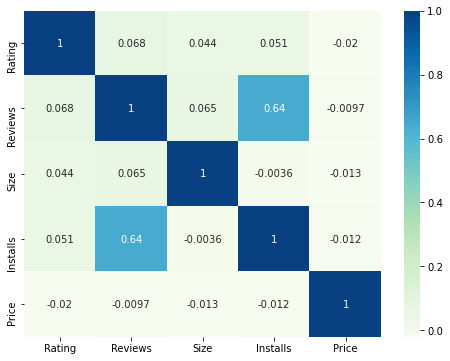

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot = True, annot_kws={'size': 10}, cmap = 'GnBu')

C:\Users\PALAK\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


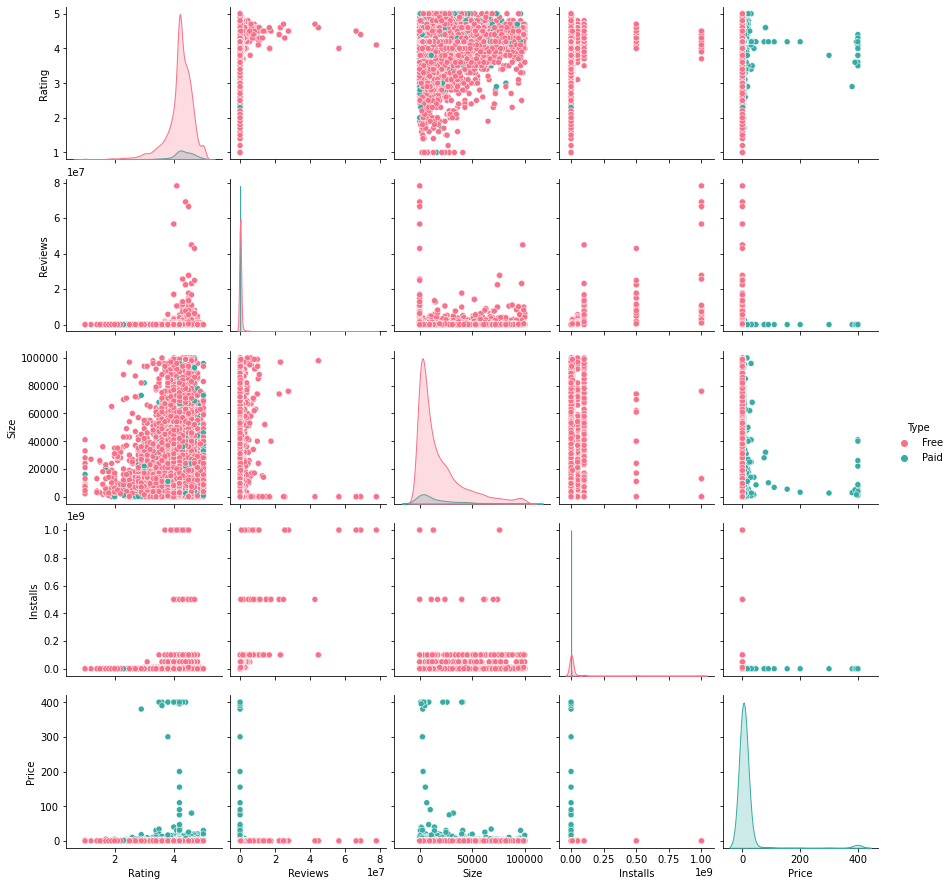

In [26]:
sns.pairplot(data, hue = 'Type', palette = 'husl')

### Looking for outliers

<AxesSubplot:ylabel='Rating'>

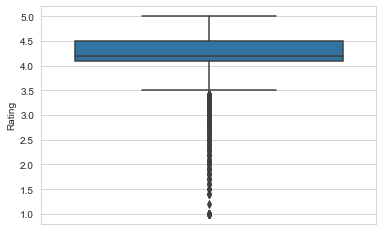

In [28]:
sns.set_style("whitegrid")
sns.boxplot(y='Rating', data=data)

From the boxplot obtained, it is observed that all the apps for which the rating is less than 3.5 will be considered as outiers. Since, they will affect the accuracy of the model, thus, they must be deleted. So, all the rows that contain the data of apps with rating less than 3.5 will be deleted from the dataset.

In [29]:
a = [x for x in data['Rating'] if x<3.5]
len(a)

732

So, these 732 rows will be deleted from the data set.

In [30]:
data = data.loc[data['Rating']>=3.5]

In [31]:
data.shape

(10086, 13)

<AxesSubplot:ylabel='Rating'>

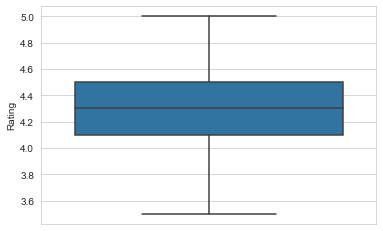

In [32]:
sns.boxplot(y='Rating', data=data)

In [33]:
data.nunique()

Rating              17
App               8921
Category            33
Reviews           5807
Size               428
Installs            20
Type                 2
Price               87
Content Rating       6
Genres             119
Last Updated      1328
Current Ver       2641
Android Ver         33
dtype: int64

#### Question 1 : Which category of applications gets maximum average reviews?

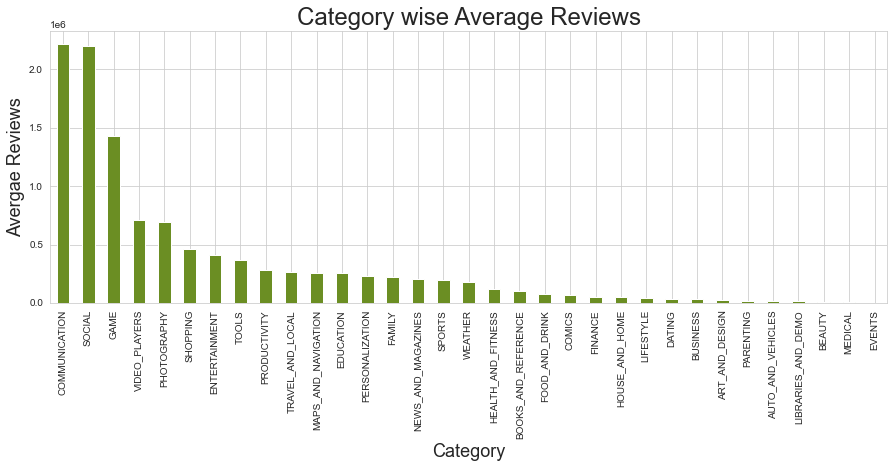

In [34]:
x = data['Category']
y = data.sort_values('Reviews', ascending = False)

fig = plt.figure(figsize = (15,5))
data.groupby(['Category'])['Reviews'].mean().sort_values(ascending = False).plot.bar(color = 'olivedrab')
plt.xticks(rotation='vertical')
plt.title('Category wise Average Reviews', fontsize = 24)
plt.xlabel('Category', fontsize = 18)
plt.ylabel('Avergae Reviews', fontsize = 18);

#### Question 2:  Which category of applications has greatest average size?

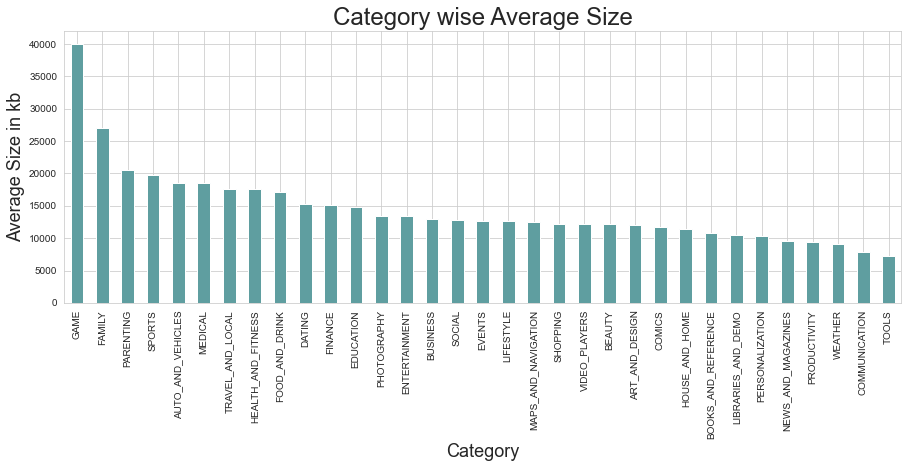

In [35]:
x = data['Category']
y = data.sort_values('Size', ascending = False)

fig = plt.figure(figsize = (15,5))
data.groupby(['Category'])['Size'].mean().sort_values(ascending = False).plot.bar(color = 'cadetblue')
plt.xticks(rotation='vertical')
plt.title('Category wise Average Size', fontsize = 24)
plt.xlabel('Category', fontsize = 18)
plt.ylabel('Average Size in kb', fontsize = 18);

Free    10027
Paid      791
Name: Type, dtype: int64


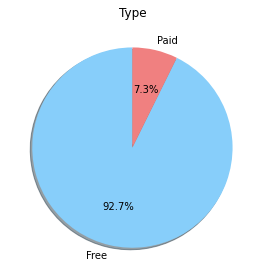

In [27]:
print(data['Type'].value_counts())
colors = ['lightskyblue', 'lightcoral']
plt.pie(data['Type'].value_counts(), labels = ['Free', 'Paid'], autopct='%1.1f%%', colors = colors, shadow = True, startangle = 90)
plt.title("Type")
plt.tight_layout()

#### Question 3: Which category of application has highest average price?

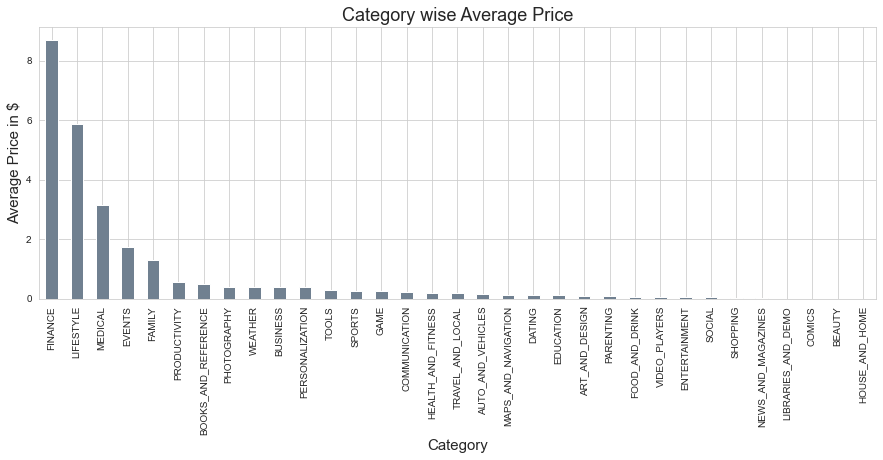

In [37]:
x = data['Category']
y = data.sort_values('Price', ascending = False)

fig = plt.figure(figsize = (15,5))
data.groupby(['Category'])['Price'].mean().sort_values(ascending = False).plot.bar(color = 'slategrey')
plt.xticks(rotation='vertical')
plt.title('Category wise Average Price', fontsize = 18)
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Average Price in $', fontsize = 15);

#### Question 4: What is the relationship between reviews and installs?


C:\Users\PALAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


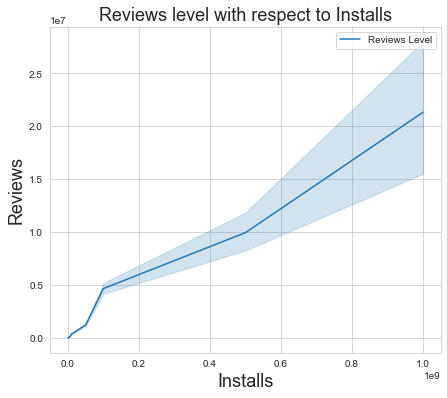

In [40]:
plt.figure(figsize=(7,6))
sns.lineplot(data['Installs'],data['Reviews'], label = 'Reviews Level');
plt.xlabel('Installs', fontsize = 18)
plt.ylabel('Reviews', fontsize = 18)
plt.title('Reviews level with respect to Installs',fontsize = 18);